# Load Data

In [1]:
import pandas as pd

f = pd.read_csv('cleanedMM.csv')

In [2]:
f

,team1_adjde,team1_adjoe,team1_fg2pct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_rpi_rating,team1_seed,team1_tempo,team2_adjde,team2_arate,team2_fg3pct,team2_oe,team2_oppftpct,team2_seed,APRdiff,result
0,88,120,54,44,36,65,1,1,65,104,56,35,105,65,16,4,1
1,88,120,54,44,36,65,1,1,65,95,54,35,107,70,12,9,1
2,88,120,54,44,36,65,1,1,65,93,59,40,114,67,4,40,1
3,88,120,54,44,36,65,1,1,65,91,63,40,116,71,1,1,0
4,93,113,52,42,33,67,1,4,71,99,67,36,109,73,7,9,1
5,93,103,49,45,33,65,1,12,67,94,62,35,117,67,5,41,0
6,91,119,54,44,34,71,1,1,77,108,58,34,107,70,16,4,1
7,95,114,51,48,35,67,1,3,71,98,57,35,107,72,11,-9,1
8,93,113,55,47,34,68,1,6,60,93,56,37,112,70,3,-33,1
9,91,119,54,44,34,71,1,1,77,90,57,29,100,68,9,-23,1


In [3]:
data = f.iloc[:,0:16]

In [4]:
data

,team1_adjde,team1_adjoe,team1_fg2pct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_rpi_rating,team1_seed,team1_tempo,team2_adjde,team2_arate,team2_fg3pct,team2_oe,team2_oppftpct,team2_seed,APRdiff
0,88,120,54,44,36,65,1,1,65,104,56,35,105,65,16,4
1,88,120,54,44,36,65,1,1,65,95,54,35,107,70,12,9
2,88,120,54,44,36,65,1,1,65,93,59,40,114,67,4,40
3,88,120,54,44,36,65,1,1,65,91,63,40,116,71,1,1
4,93,113,52,42,33,67,1,4,71,99,67,36,109,73,7,9
5,93,103,49,45,33,65,1,12,67,94,62,35,117,67,5,41
6,91,119,54,44,34,71,1,1,77,108,58,34,107,70,16,4
7,95,114,51,48,35,67,1,3,71,98,57,35,107,72,11,-9
8,93,113,55,47,34,68,1,6,60,93,56,37,112,70,3,-33
9,91,119,54,44,34,71,1,1,77,90,57,29,100,68,9,-23


# Standarize Data

In [5]:
from sklearn import preprocessing

In [6]:
data = preprocessing.scale(data)

In [7]:
import numpy as np
from sklearn.cross_validation import train_test_split
X, y = data, f['result']

C:\Users\Administrator\Anaconda2\envs\py3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Results of 8 classification algorithms

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
neigh.predict(X_train)
neigh.predict(X_test)
neigh.score(X_train,y_train)

0.81481481481481477

In [11]:
neigh.predict_proba(X_train)

array([[ 0.66666667,  0.33333333],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       ..., 
       [ 0.66666667,  0.33333333],
       [ 1.        ,  0.        ],
       [ 0.33333333,  0.66666667]])

In [12]:
import numpy as np
import math

In [13]:
def compute_measure(predicted_label,true_label):
    t_idx=(predicted_label==true_label)
    f_idx=np.logical_not(t_idx)
    p_idx=(true_label>0)
    n_idx=np.logical_not(p_idx)
    tp=np.sum(np.logical_and(t_idx,p_idx))
    tn=np.sum(np.logical_and(t_idx,n_idx))
    fp=np.sum(n_idx)-tn
    fn=np.sum(p_idx)-tp
    tp_fp_tn_fn_list=[]
    tp_fp_tn_fn_list.append(tp)
    tp_fp_tn_fn_list.append(fp)
    tp_fp_tn_fn_list.append(tn)
    tp_fp_tn_fn_list.append(fn)
    tp_fp_tn_fn_list=np.array(tp_fp_tn_fn_list)
    tp=tp_fp_tn_fn_list[0]
    fp=tp_fp_tn_fn_list[1]
    tn=tp_fp_tn_fn_list[2]
    fn=tp_fp_tn_fn_list[3]
    with np.errstate(divide='ignore'):
        sen=(1.0*tp)/(tp+fn)
    with np.errstate(divide='ignore'):
        spc=(1.0*tn)/(fp+tn)
    with np.errstate(divide='ignore'):
        ppr=(1.0*tp)/(fp+tp)
    with np.errstate(divide='ignore'):
        npr=(1.0*tn)/(fn+tn)
    acc=(tp+tn)*1.0/(tp+fp+tn+fn)
    ans=[]
    ans.append(acc)
    ans.append(sen)
    ans.append(spc)
    ans.append(ppr)
    ans.append(npr)
    
    return ans

In [14]:
ans=compute_measure(neigh.predict(X_train),y_train)
ans

[0.81481481481481477,
 0.81847133757961787,
 0.81071428571428572,
 0.82903225806451608,
 0.79929577464788737]

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error(y_test, neigh.predict(X_test))

0.36078431372549019

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
rf.predict(X_train)
rf.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [20]:
rf.score(X_train,y_train)

0.74579124579124578

In [21]:
rf.predict_proba(X_train)

array([[ 0.47144517,  0.52855483],
       [ 0.71691377,  0.28308623],
       [ 0.41009746,  0.58990254],
       ..., 
       [ 0.48409331,  0.51590669],
       [ 0.62455967,  0.37544033],
       [ 0.49133427,  0.50866573]])

In [22]:
ans=compute_measure(rf.predict(X_train),y_train)
ans

[0.74579124579124578,
 0.77707006369426757,
 0.71071428571428574,
 0.75076923076923074,
 0.7397769516728625]

In [23]:
mean_squared_error(y_test, rf.predict(X_test))

0.29803921568627451

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
import time

In [26]:
neuron_no=50
hiddle_layer_no=1

In [27]:
nn=MLPClassifier(alpha=1e-5,hidden_layer_sizes=(neuron_no,hiddle_layer_no),random_state=20,max_iter=5000)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=20, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [28]:
print(nn)
time.sleep(2)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=20, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [29]:
nn.predict(X_train)
nn.predict(X_test)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [30]:
nn.score(X_train,y_train)

0.96632996632996637

In [31]:
ans=compute_measure(nn.predict(X_train),y_train)
ans

[0.96632996632996637, 1.0, 0.9285714285714286, 0.94011976047904189, 1.0]

In [32]:
nn.predict_proba(X_train)

array([[  9.96091486e-01,   3.90851386e-03],
       [  9.99890343e-01,   1.09657044e-04],
       [  9.55035493e-02,   9.04496451e-01],
       ..., 
       [  9.55035493e-02,   9.04496451e-01],
       [  9.97352225e-01,   2.64777469e-03],
       [  9.55035493e-02,   9.04496451e-01]])

In [33]:
mean_squared_error(y_test, nn.predict(X_test))

0.30980392156862746

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
logit.predict(X_train)
logit.predict(X_test)
logit.score(X_train,y_train)

0.73063973063973064

In [37]:
logit.predict_proba(X_train)

array([[ 0.53267815,  0.46732185],
       [ 0.94831799,  0.05168201],
       [ 0.23904728,  0.76095272],
       ..., 
       [ 0.40828115,  0.59171885],
       [ 0.77757506,  0.22242494],
       [ 0.43987255,  0.56012745]])

In [38]:
ans=compute_measure(logit.predict(X_train),y_train)
ans

[0.73063973063973064,
 0.76114649681528668,
 0.6964285714285714,
 0.73765432098765427,
 0.72222222222222221]

In [39]:
mean_squared_error(y_test, logit.predict(X_test))

0.23529411764705882

In [40]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
svc.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
svc.predict(X_train)
svc.predict(X_test)
svc.score(X_train,y_train)

0.84006734006734007

In [42]:
svc.predict_proba(X_train)

array([[ 0.63590262,  0.36409738],
       [ 0.77852558,  0.22147442],
       [ 0.2445084 ,  0.7554916 ],
       ..., 
       [ 0.42120081,  0.57879919],
       [ 0.78976852,  0.21023148],
       [ 0.23107095,  0.76892905]])

In [43]:
ans=compute_measure(svc.predict(X_train),y_train)
ans

[0.84006734006734007,
 0.89490445859872614,
 0.77857142857142858,
 0.81924198250728864,
 0.86852589641434264]

In [44]:
mean_squared_error(y_test, svc.predict(X_test))

0.27450980392156865

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [46]:
gnb.predict(X_train)
gnb.predict(X_test)
gnb.score(X_train,y_train)

0.72558922558922556

In [47]:
gnb.predict_proba(X_train)

array([[ 0.43055356,  0.56944644],
       [ 0.88906672,  0.11093328],
       [ 0.06330483,  0.93669517],
       ..., 
       [ 0.34549024,  0.65450976],
       [ 0.81468829,  0.18531171],
       [ 0.49737247,  0.50262753]])

In [48]:
ans=compute_measure(gnb.predict(X_train),y_train)
ans

[0.72558922558922556,
 0.76751592356687903,
 0.6785714285714286,
 0.72809667673716016,
 0.72243346007604559]

In [49]:
mean_squared_error(y_test, gnb.predict(X_test))

0.2627450980392157

In [50]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None)
dt = dt.fit(X_train, y_train)

In [51]:
dt.predict(X_train)
dt.predict(X_test)
dt.score(X_train,y_train)

0.70707070707070707

In [52]:
dt.predict_proba(X_train)

array([[ 0.45454545,  0.54545455],
       [ 0.90804598,  0.09195402],
       [ 0.42553191,  0.57446809],
       ..., 
       [ 0.45454545,  0.54545455],
       [ 0.90804598,  0.09195402],
       [ 0.62773723,  0.37226277]])

In [53]:
ans=compute_measure(dt.predict(X_train),y_train)
ans

[0.70707070707070707,
 0.80891719745222934,
 0.59285714285714286,
 0.69021739130434778,
 0.73451327433628322]

In [54]:
mean_squared_error(y_test, dt.predict(X_test))

0.31764705882352939

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
gb.score(X_test, y_test)      

0.70588235294117652

In [56]:
gb.predict_proba(X_train)

array([[ 0.7073566 ,  0.2926434 ],
       [ 0.8298697 ,  0.1701303 ],
       [ 0.12659005,  0.87340995],
       ..., 
       [ 0.56537427,  0.43462573],
       [ 0.77072429,  0.22927571],
       [ 0.49112358,  0.50887642]])

In [57]:
ans=compute_measure(gb.predict(X_train),y_train)
ans

[0.93097643097643101,
 0.92993630573248409,
 0.93214285714285716,
 0.93890675241157562,
 0.92226148409893993]

In [58]:
mean_squared_error(y_test, gb.predict(X_test))

0.29411764705882354

# Ensemble Model

In [59]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
clf4 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0)
eclf = VotingClassifier(estimators=[('Logit', clf1), ('gnb', clf2), ('SVC', clf3), ('GB', clf4)], voting='soft', weights=[0.9,0.888,0.883,0.875])

params = {'SVC__degree': [1, 10],'GB__n_estimators':[1000,2000]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train,y_train)

In [60]:
grid.score(X_train,y_train)

0.8164983164983165

In [61]:
grid.score(X_test,y_test)

0.75294117647058822

# Model evaluation

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
predict_test=grid.predict(X_test)

In [64]:
confusion_matrix(y_test, predict_test)

array([[ 77,  38],
       [ 25, 115]], dtype=int64)

In [65]:
predict_train=grid.predict(X_train)

In [66]:
confusion_matrix(y_train, predict_train)

array([[217,  63],
       [ 46, 268]], dtype=int64)

In [67]:
ans=compute_measure(predict_train,y_train)
ans

[0.8164983164983165,
 0.85350318471337583,
 0.77500000000000002,
 0.80966767371601212,
 0.82509505703422048]

In [68]:
ans=compute_measure(predict_test,y_test)
ans

[0.75294117647058822,
 0.8214285714285714,
 0.66956521739130437,
 0.75163398692810457,
 0.75490196078431371]

# Cross validation

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score

scoring = ['precision', 'recall','accuracy','roc_auc','neg_log_loss']
scores = cross_validate(grid, X, y, scoring=scoring,
                        cv=10, return_train_score=True)
sorted(scores.keys())                 

print (scores['test_neg_log_loss'])

[-0.54264455 -0.49880503 -0.52271742 -0.57060258 -0.67163355 -0.62796049
 -0.58781833 -0.59473007 -0.50426761 -0.56300763]


# ROC

In [71]:
predict_proba=grid.predict_proba(data)

In [72]:
import numpy as np  
predict_proba = np.delete(predict_proba, -2, axis=1)  

In [73]:
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)

In [74]:
def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    fig, ax = plt.subplots()
    ax.set(title='Receiver Operating Characteristic',
           xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

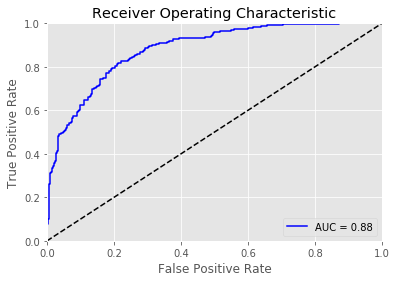

In [76]:
fpr, tpr, thresholds = roc_curve(f['result'].values, predict_proba)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [77]:
mean_squared_error(y_test, predict_test)

0.24705882352941178

# Make prediction

In [78]:
f = pd.read_csv('2018.csv')

In [79]:
newdata = pd.DataFrame(f)

In [80]:
newdata = preprocessing.scale(newdata)

In [81]:
newdata

array([[ 0.02787225,  2.42004263,  2.27937868, ..., -1.58695329,
        -1.60718669,  1.18874737],
       [ 0.02787225,  2.42004263,  2.27937868, ..., -0.81414671,
        -1.39121387,  1.32494757],
       [ 0.02787225,  2.42004263,  2.27937868, ...,  0.54032501,
        -1.17524105,  1.12064727],
       ..., 
       [ 0.23244084, -1.52947698,  0.24558675, ...,  0.44673336,
         1.41643282,  0.91634696],
       [ 0.23244084, -1.52947698,  0.24558675, ..., -2.1051642 ,
         1.41643282,  1.76759823],
       [ 0.94843092, -1.63451739, -0.26996101, ..., -2.1051642 ,
         1.41643282,  0.71204665]])

In [82]:
new_predict_proba=grid.predict_proba(newdata)

In [83]:
new_predict_proba = pd.DataFrame(new_predict_proba)

In [70]:
new_predict_proba.to_csv("new_predict_proba.csv",index=True,sep=',')